# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
#Import your libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather` data. 

#### First, import it into a data frame called `austin`. 

In [2]:
# Your code here
austin = pd.read_csv("austin_weather.csv")
austin

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [3]:
potential_categorical_from_numerical = austin.select_dtypes("number").loc[:, austin.select_dtypes("number").nunique() < 200]
potential_categorical_from_numerical

,TempHighF,TempAvgF,TempLowF
0,74,60,45
1,56,48,39
2,58,45,32
3,61,46,31
4,58,50,41
...,...,...,...
1314,103,89,75
1315,105,91,76
1316,107,92,77
1317,106,93,79


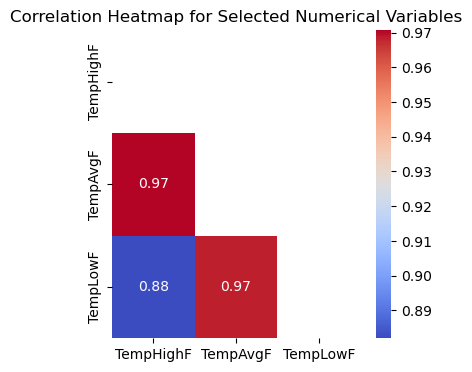

In [4]:
correlation_matrix = potential_categorical_from_numerical.corr()

matrix = np.triu(correlation_matrix)

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(4, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=matrix)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [5]:
# Your code here
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [6]:
austin.describe(())

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
50%,83.000000,73.000000,63.000000
max,107.000000,93.000000,81.000000


In [7]:
# Your code here
austin.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

1 - There's a strong relation between the temperatures as expeted.
2 - 
3 - 

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [8]:
# Your code here
austin["DewPointAvgF"].unique()

array(['49', '36', '27', '28', '40', '39', '41', '26', '42', '22', '48',
       '32', '8', '11', '45', '55', '61', '37', '47', '25', '23', '20',
       '33', '30', '29', '17', '14', '13', '54', '59', '15', '24', '34',
       '35', '57', '50', '53', '60', '46', '56', '51', '31', '38', '62',
       '43', '63', '64', '67', '66', '58', '70', '68', '65', '69', '71',
       '72', '-', '73', '74', '21', '44', '52', '12', '75', '76', '18'],
      dtype=object)

In [9]:
austin.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Date                          False
TempHighF                      True
TempAvgF                       True
TempLowF                       True
DewPointHighF                 False
DewPointAvgF                  False
DewPointLowF                  False
HumidityHighPercent           False
HumidityAvgPercent            False
HumidityLowPercent            False
SeaLevelPressureHighInches    False
SeaLevelPressureAvgInches     False
SeaLevelPressureLowInches     False
VisibilityHighMiles           False
VisibilityAvgMiles            False
VisibilityLowMiles            False
WindHighMPH                   False
WindAvgMPH                    False
WindGustMPH                   False
PrecipitationSumInches        False
Events                        False
dtype: bool

# Your observation here
In my opinion it should be changed because the only values that aren't numeric are the ones that don't have information.

The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [10]:
wrong_type_columns = ['DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']

In [11]:
# Your code here
austin[wrong_type_columns] = austin[wrong_type_columns].apply(pd.to_numeric, errors='coerce')
austin

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2013-12-23,58,45,32,31,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,2013-12-24,61,46,31,36,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,2013-12-25,58,50,41,44,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67.0,61.0,82.0,54.0,25.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00,
1315,2017-07-28,105,91,76,71,64.0,55.0,87.0,54.0,20.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00,
1316,2017-07-29,107,92,77,72,64.0,55.0,82.0,51.0,19.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00,
1317,2017-07-30,106,93,79,70,68.0,63.0,69.0,48.0,27.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00,


#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [12]:
# Your code here
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [13]:
# Your code here
tryy=austin.isnull().any(axis=1)
type(tryy)

pandas.core.series.Series

In [14]:
missing_values = tryy[tryy ==True].index
missing_values


Index([   4,    6,    7,   42,   51,   66,   95,  102,  103,  104,
       ...
       1215, 1229, 1236, 1244, 1259, 1269, 1288, 1304, 1308, 1313],
      dtype='int64', length=136)

In [15]:
missing_values = pd.DataFrame(austin, index=missing_values)
missing_values

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
4,2013-12-25,58,50,41,44,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,
6,2013-12-27,60,53,45,41,39.0,37.0,83.0,65.0,47.0,...,30.39,30.34,10.0,9.0,7.0,7.0,1.0,11.0,NaN,
7,2013-12-28,62,51,40,43,39.0,33.0,92.0,64.0,36.0,...,30.17,30.04,10.0,10.0,7.0,10.0,2.0,14.0,NaN,
42,2014-02-01,76,66,55,62,59.0,41.0,81.0,71.0,60.0,...,29.81,29.75,10.0,10.0,9.0,14.0,6.0,26.0,NaN,Rain
51,2014-02-10,60,48,35,49,36.0,30.0,82.0,74.0,66.0,...,30.15,30.02,10.0,8.0,4.0,15.0,9.0,23.0,NaN,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2017-06-12,94,85,75,72,68.0,62.0,87.0,62.0,36.0,...,29.89,29.81,10.0,10.0,2.0,15.0,7.0,22.0,NaN,Rain
1288,2017-07-01,98,89,79,76,72.0,66.0,85.0,62.0,38.0,...,30.02,29.92,10.0,9.0,6.0,15.0,7.0,24.0,NaN,
1304,2017-07-17,98,88,77,75,71.0,66.0,88.0,63.0,38.0,...,29.90,29.84,10.0,10.0,10.0,16.0,3.0,23.0,NaN,"Rain , Thunderstorm"
1308,2017-07-21,104,91,77,74,68.0,61.0,85.0,56.0,27.0,...,29.95,29.86,10.0,10.0,10.0,14.0,5.0,24.0,NaN,


There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [16]:
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

In [17]:
missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 4 to 1313
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        136 non-null    object 
 1   TempHighF                   136 non-null    int64  
 2   TempAvgF                    136 non-null    int64  
 3   TempLowF                    136 non-null    int64  
 4   DewPointHighF               136 non-null    object 
 5   DewPointAvgF                129 non-null    float64
 6   DewPointLowF                129 non-null    float64
 7   HumidityHighPercent         134 non-null    float64
 8   HumidityAvgPercent          134 non-null    float64
 9   HumidityLowPercent          134 non-null    float64
 10  SeaLevelPressureHighInches  133 non-null    float64
 11  SeaLevelPressureAvgInches   133 non-null    float64
 12  SeaLevelPressureLowInches   133 non-null    float64
 13  VisibilityHighMiles         124 non-nul

In [19]:
# Your code here


#### Calculate the ratio of missing rows to total rows

In [18]:
(missing_values["TempHighF"].value_counts().sum())/(austin["TempHighF"].value_counts().sum())

0.10310841546626232

In [19]:
# Your code here
136/1319

0.10310841546626232

As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [20]:
# Your code here
austin.isna().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   0
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [21]:
# Your code here
(austin["PrecipitationSumInches"].isna().sum())/(austin["TempHighF"].value_counts().sum())

0.09401061410159212

Almost 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [22]:
# Your code here 
austin.drop(columns="PrecipitationSumInches", inplace=True)

# Print `austin` to confirm the column is indeed removed

austin

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events
0,2013-12-21,74,60,45,67,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,
2,2013-12-23,58,45,32,31,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,
3,2013-12-24,61,46,31,36,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,
4,2013-12-25,58,50,41,44,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,
1315,2017-07-28,105,91,76,71,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,
1316,2017-07-29,107,92,77,72,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,
1317,2017-07-30,106,93,79,70,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,


#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [91]:
# Your code here
austin_fixed = austin.interpolate()

/var/folders/nt/dslv10js033g889ybfhq1dmw0000gn/T/ipykernel_6875/3998576702.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  austin_fixed = austin.interpolate()


#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [92]:
# Your code here
austin_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1319 non-null   float64
 6   DewPointLowF                1319 non-null   float64
 7   HumidityHighPercent         1319 non-null   float64
 8   HumidityAvgPercent          1319 non-null   float64
 9   HumidityLowPercent          1319 non-null   float64
 10  SeaLevelPressureHighInches  1319 non-null   float64
 11  SeaLevelPressureAvgInches   1319 non-null   float64
 12  SeaLevelPressureLowInches   1319 non-null   float64
 13  VisibilityHighMiles         1319 

In [93]:
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [94]:
# Your code here:
austin_fixed["Events"].value_counts()

Events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

# Your answer:
3 -> Fog , Rain , Thunderstorm

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [95]:


event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']

# Your code here

for event in event_list:
    austin_fixed[event] = 0



# Print your new dataframe to check whether new columns have been created:

austin_fixed



,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,0,0
1,2013-12-22,56,48,39,43,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67.0,61.0,82.0,54.0,25.0,...,10.0,10.0,12.0,5.0,21.0,,0,0,0,0
1315,2017-07-28,105,91,76,71,64.0,55.0,87.0,54.0,20.0,...,10.0,10.0,14.0,5.0,20.0,,0,0,0,0
1316,2017-07-29,107,92,77,72,64.0,55.0,82.0,51.0,19.0,...,10.0,10.0,12.0,4.0,17.0,,0,0,0,0
1317,2017-07-30,106,93,79,70,68.0,63.0,69.0,48.0,27.0,...,10.0,10.0,13.0,4.0,20.0,,0,0,0,0


#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

In [96]:
# Your code here
def weather(austin_fixed, event_list):
    for x in event_list:
        austin_fixed[x] = austin_fixed["Events"].apply(lambda y: 1 if x in y else 0)
    return austin_fixed

In [97]:
austin_fixed = weather(austin_fixed, event_list)

#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [98]:
# Your code here
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
1,2013-12-22,56,48,39,43,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67.0,61.0,82.0,54.0,25.0,...,10.0,10.0,12.0,5.0,21.0,,0,0,0,0
1315,2017-07-28,105,91,76,71,64.0,55.0,87.0,54.0,20.0,...,10.0,10.0,14.0,5.0,20.0,,0,0,0,0
1316,2017-07-29,107,92,77,72,64.0,55.0,82.0,51.0,19.0,...,10.0,10.0,12.0,4.0,17.0,,0,0,0,0
1317,2017-07-30,106,93,79,70,68.0,63.0,69.0,48.0,27.0,...,10.0,10.0,13.0,4.0,20.0,,0,0,0,0


#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [99]:
# Your code here
austin_fixed.drop(columns="Events", inplace=True)

# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [100]:
# Your code here
from datetime import datetime

date_format = "%Y-%m-%d"

austin_fixed["Date"] = austin_fixed["Date"].apply(lambda x: datetime.strptime(str(x), date_format))

austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,2013-12-22,56,48,39,43,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,2013-12-23,58,45,32,31,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,2013-12-24,61,46,31,36,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,2013-12-25,58,50,41,44,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67.0,61.0,82.0,54.0,25.0,...,10.0,10.0,10.0,12.0,5.0,21.0,0,0,0,0
1315,2017-07-28,105,91,76,71,64.0,55.0,87.0,54.0,20.0,...,10.0,10.0,10.0,14.0,5.0,20.0,0,0,0,0
1316,2017-07-29,107,92,77,72,64.0,55.0,82.0,51.0,19.0,...,10.0,10.0,10.0,12.0,4.0,17.0,0,0,0,0
1317,2017-07-30,106,93,79,70,68.0,63.0,69.0,48.0,27.0,...,10.0,10.0,10.0,13.0,4.0,20.0,0,0,0,0


In [104]:
austin_fixed["Date"] = austin_fixed["Date"].apply(lambda x: x.toordinal())

#### Print `austin_fixed` to check your `Date` column.

In [108]:
austin_fixed.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,60,45,67,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,48,39,43,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,45,32,31,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,46,31,36,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,50,41,44,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [111]:
# Your code here:
features = austin_fixed[['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']]
target = austin_fixed["TempAvgF"]

In the next cell, import `train_test_split` from `sklearn.model_selection`

In [ ]:
#Your code here:


Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [112]:
#Your code here:
X_train, X_test, y_train, y_test = train_test_split(features ,target,test_size=0.20)

#### Congratulations! Now you have finished the preparation of the dataset!

# Bonus Challenge 1

#### While the above is the common practice to prepare most datasets, when it comes to time series data, we sometimes do not want to randomly select rows from our dataset.

This is because many time series algorithms rely on observations having equal time distances between them. In such cases, we typically select the majority of rows as the test data and the last few rows as the training data. We don't use `train_test_split()` to select the train/test data because it returns random selections.

In the following cell, compute the number of rows that account for 80% of our data and round it to the next integer. Assign this number to `ts_rows`.

In [ ]:
# Your code here:


Assign the first `ts_rows` rows of `X` to `X_ts_train` and the remaining rows to `X_ts_test`.

In [ ]:
# Your code here:


Assign the first `ts_rows` rows of `y` to `y_ts_train` and the remaining rows to `y_ts_test`.

In [ ]:
# Your code here:
